In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import geopandas
import seaborn as sns

In [2]:
files = os.listdir('overpass_one_mile_191002/crashes/')

In [3]:
collision_per_aadt = geopandas.read_file('pa_collsion_per_traffic_191002.shp')

In [5]:
collision_per_aadt.shape

(23236, 3)

In [19]:
df_list = list()
for i in range(10001):
    df_list.append(pd.read_csv('overpass_one_mile_191002/crashes/{}.csv'.format(str(i).rjust(4,'0')),  index_col=0))

In [21]:
feature_df = pd.concat(df_list, sort=True, ignore_index=True)
feature_df.dropna(axis=1, how='all', inplace=True)
#feature_df.reset_index(inplace=True)

In [22]:
feature_df.shape

(10001, 817)

In [23]:
feature_df.head()

,area_aeroway.aerodrome,area_aeroway.approach_light,area_aeroway.apron,area_aeroway.hangar,area_aeroway.helipad,area_aeroway.holding_position,area_aeroway.model_aerodrome,area_aeroway.parking_position,area_aeroway.runway,area_aeroway.taxiway,...,road_surface.metal_grate,road_surface.metal_grid,road_surface.paved,road_surface.paved+wood,road_surface.paving_stones,road_surface.stone,road_surface.underConstruction,road_surface.unimproved,road_surface.unpaved,road_surface.wood
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
feature_df.tail()

,area_aeroway.aerodrome,area_aeroway.approach_light,area_aeroway.apron,area_aeroway.hangar,area_aeroway.helipad,area_aeroway.holding_position,area_aeroway.model_aerodrome,area_aeroway.parking_position,area_aeroway.runway,area_aeroway.taxiway,...,road_surface.metal_grate,road_surface.metal_grid,road_surface.paved,road_surface.paved+wood,road_surface.paving_stones,road_surface.stone,road_surface.underConstruction,road_surface.unimproved,road_surface.unpaved,road_surface.wood
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
collision_per_aadt.head()

,CUR_AADT,collision_,geometry
0,37768,0.000026,LINESTRING (-79.9197201057041 40.5979352880057...
1,7145,0.000140,LINESTRING (-79.9547751055742 40.4444171779927...
2,4494,0.000223,LINESTRING (-79.89587762102187 40.445347103532...
3,1376,0.000727,LINESTRING (-79.90204636284997 40.463871444125...
4,13954,0.000143,LINESTRING (-80.03588169337985 40.544586323724...


In [28]:
collision_per_aadt.shape

(23236, 3)

In [31]:
feature_df['collision_per_aadt'] = collision_per_aadt.loc[feature_df.index, 'collision_']

In [148]:
np.sort(feature_df.collision_per_aadt)

array([8.58177574e-06, 1.20352875e-05, 1.30110073e-05, ...,
                  nan,            nan,            nan])

In [153]:
np.sort(collision_per_aadt.collision_)

array([8.19900628e-06, 8.19900628e-06, 8.58177574e-06, ...,
                  nan,            nan,            nan])

```python
feature_df.to_csv('pa_overpass_features_plus_target_aadt_191006.csv', index=False)
```

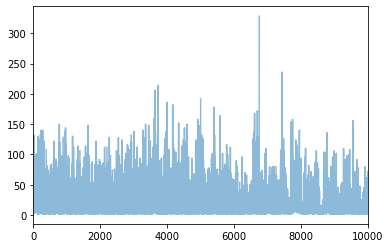

In [26]:
feature_df['area_highway.residential'].plot(alpha=.5)

In [41]:
type(cm)

numpy.ndarray

In [44]:
np.isnan(cm).sum()

669124

In [46]:
cm.shape

(818, 818)

In [47]:
818*818

669124

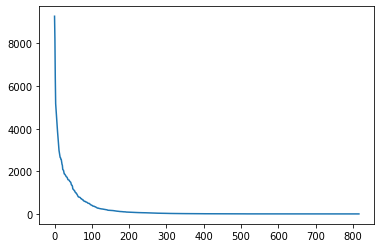

In [144]:
plt.plot(feature_df.count().sort_values(ascending=False).values[1:])

In [145]:
top_100_index = feature_df.count().sort_values(ascending=False).iloc[1:101].index

In [146]:
top_100_index

Index(['area_highway.residential', 'area_highway.service',
       'area_highway.tertiary', 'area_surface.asphalt',
       'area_highway.secondary', 'area_building.yes', 'area_waterway.stream',
       'area_service.driveway', 'area_highway.motorway',
       'area_highway.primary', 'area_highway.unclassified',
       'area_amenity.parking', 'area_highway.motorway_link',
       'area_highway.turning_circle', 'area_highway.traffic_signals',
       'road_surface.asphalt', 'area_highway.motorway_junction',
       'area_service.parking_aisle', 'area_natural.water',
       'road_highway.traffic_signals', 'area_highway.stop',
       'area_boundary.administrative', 'road_highway.secondary',
       'area_highway.footway', 'area_railway.abandoned',
       'road_highway.primary', 'area_railway.rail', 'area_leisure.park',
       'area_power.line', 'road_highway.tertiary', 'road_highway.crossing',
       'area_leisure.pitch', 'area_amenity.place_of_worship',
       'area_natural.wood', 'area_surface.

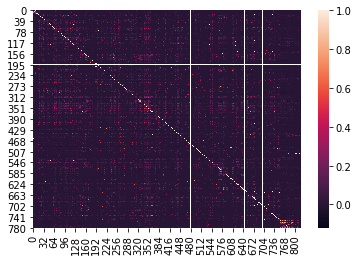

In [74]:
cm = np.corrcoef(feature_df.sample(2000).fillna(0).values.T)
sns.heatmap(cm)
#plt.savefig("vt_minimized_features_normal_target_correlation.svg")
None

In [75]:
cm.shape

(818, 818)

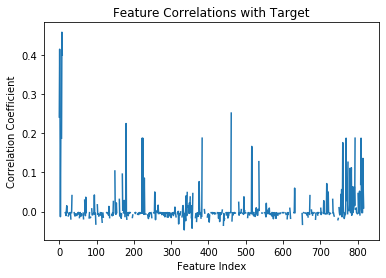

In [122]:
plt.plot(cm[0][1:])
plt.title("Feature Correlations with Target")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature Index")
None

In [99]:
cm[0][~np.isnan(cm[0])].shape

(574,)

In [86]:
cm[0][650]

nan

In [109]:
feature_df.columns[8]

'area_aeroway.runway'

In [140]:
def print_feature(_idx):
    #_idx = 810
    _name = feature_df.columns[_idx]
    _value_counts = feature_df.loc[:, _name].count()
    _coeff = cm[0][_idx]
    print("{}, number: {}, correlation: {}".format(_name, _value_counts, _coeff))

In [141]:
print_feature(8)

area_aeroway.runway, number: 80, correlation: 0.4585056768062546


In [142]:
for i in np.argsort(np.nan_to_num(cm[0], -1))[::-1]:
    print_feature(i)

area_aeroway.aerodrome, number: 114, correlation: 1.0
area_aeroway.runway, number: 80, correlation: 0.4585056768062546
area_aeroway.apron, number: 30, correlation: 0.41511849502137954
area_aeroway.taxiway, number: 57, correlation: 0.4005636996926203
area_man_made.beacon, number: 4, correlation: 0.2518785676020281
area_aeroway.approach_light, number: 9, correlation: 0.24169670845267602
area_aeroway.hangar, number: 8, correlation: 0.23746150744251293
area_barrier.yes, number: 65, correlation: 0.22512601418840555
area_aeroway.parking_position, number: 2, correlation: 0.18770162936191645
area_aeroway.windsock, number: 2, correlation: 0.18770162936191645
area_aeroway.holding_position, number: 6, correlation: 0.18770162936191645
area_building.disused, number: 3, correlation: 0.18770162936191634
area_building.entrance, number: 7, correlation: 0.1877016293619163
area_landuse.greenfield, number: 5, correlation: 0.1877016293619162
road_highway.pedestrian, number: 5, correlation: 0.18770162936191

I'm saving the filenumber to a separate list so that I can cross reference to the original dataframe rows in `collision_per_aadt` that wrote file in `pa_feature_production_191002.ipynb`.

In [49]:
df_list, file_number_list = list(), list()
for file in sorted(files)[:10000]:
    if 'csv' in file:
        file_number_list.append(int(re.findall('\d+', file)[0]))
        df_list.append(pd.read_csv('overpass_one_mile_191002/crashes/{}'.format(file), index_col=0))

In [50]:
len(df_list)

9999

In [15]:
df_list[0]

,area_barrier,area_boundary,area_healthcare,area_man_made,area_parking,area_power,area_railway,area_route,area_tourism,road_highway.secondary,...,area_highway.secondary,area_highway.tertiary,area_highway.turning_circle,area_landuse.farmland,area_leisure.pitch,area_leisure.swimming_pool,area_natural.water,area_service.driveway,area_surface.grass,area_waterway.stream
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,...,6,4,2,2,2,2,2,58,2,20


In [16]:
feature_df = pd.concat(df_list, sort=True, ignore_index=True)
feature_df.dropna(axis=1, how='all', inplace=True)
#feature_df.reset_index(inplace=True)

In [17]:
feature_df.shape

(10, 65)

In [18]:
feature_df

,area_aeroway.model_aerodrome,area_amenity.bench,area_amenity.fire_station,area_amenity.grave_yard,area_amenity.parking,area_amenity.place_of_worship,area_amenity.ranger_station,area_amenity.shelter,area_amenity.toilets,area_barrier.fence,...,area_waterway.river,area_waterway.riverbank,area_waterway.stream,road_highway.crossing,road_highway.primary,road_highway.secondary,road_highway.service,road_highway.traffic_signals,road_highway.trunk,road_surface.asphalt
0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.0,24.0,8.0,98.0,2.0,34.0,46.0,74.0
1,NaN,10.0,2.0,NaN,14.0,NaN,NaN,8.0,2.0,18.0,...,2.0,4.0,8.0,24.0,8.0,98.0,NaN,34.0,46.0,74.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,12.0,22.0,NaN,6.0,NaN,8.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.0,NaN,4.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.0,NaN,4.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,14.0,2.0,2.0,2.0,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,58.0,NaN,4.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.0,NaN,4.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.0,NaN,4.0,NaN,NaN
9,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.0,NaN,4.0,NaN,NaN


```python
feature_df.to_csv('pa_overpass_features_plus_target_aadt_CORRECTED_190926.csv', index=False)
```

In [55]:
feature_df.iloc[0,:]

area_aeroway.aerodrome                 NaN
area_aeroway.approach_light            NaN
area_aeroway.apron                     NaN
area_aeroway.hangar                    NaN
area_aeroway.helipad                   NaN
area_aeroway.holding_position          NaN
area_aeroway.model_aerodrome           NaN
area_aeroway.parking_position          NaN
area_aeroway.runway                    NaN
area_aeroway.taxiway                   NaN
area_aeroway.terminal                  NaN
area_aeroway.windsock                  NaN
area_amenity.Architectural Metalwork   NaN
area_amenity.Northern_Berks_EMS        NaN
area_amenity.Office Furniture          NaN
area_amenity.Pet Supplies              NaN
area_amenity.animal_boarding           NaN
area_amenity.animal_shelter            NaN
area_amenity.arts_centre               NaN
area_amenity.atm                       NaN
area_amenity.bank                      NaN
area_amenity.bar                       NaN
area_amenity.bar;pub                   NaN
area_amenit